# ****Project 2 : Toxic Tweets Dataset : NLP Problem****

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('FinalBalancedDataset.csv')
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [ ]:
df.Toxicity.value_counts()
len(df)

56745

In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)

In [ ]:
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [ ]:
#Removing punctuations and digits from the string
import string
def remove_punc_dig(text : str):
    '''
    text : str
    This function will remove all the punctuations and digits from the "text"
    '''
    to_remove = string.punctuation + string.digits
    cur_text = ""
    for i in range(len(text)):
        if text[i] in to_remove:
            cur_text += " "
        else:
            cur_text += text[i].lower()
    cur_text = " ".join(cur_text.split())
    return cur_text


In [ ]:
df['cur_tweet'] = df['tweet'].apply(lambda x:remove_punc_dig(x))

In [ ]:

df

,Toxicity,tweet,cur_tweet
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie lifeasking pearls corey ...
56741,1,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [ ]:
# we don't need tweet column now so dropping the column
df.drop(columns=['tweet'], axis=1,inplace=True)

In [ ]:
df

,Toxicity,cur_tweet
0,0,user when a father is dysfunctional and is so ...
1,0,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð...
4,0,factsguide society now motivation
...,...,...
56740,1,you s a muthaf in lie lifeasking pearls corey ...
56741,1,you ve gone and broke the wrong heart baby and...
56742,1,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies


In [ ]:
# removing stop words like I,my,myself,etc
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

In [ ]:
# we will use spacy lemmatizer API to perform lemmatization on cur_tweet and removing stop words
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
def remove_stop_words(text: str):
    '''
    text : str
    This function will remove stop words like I,my,myself etc
    '''
    filtered_sentence = []
    for word in text.split(' '):
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return " ".join(filtered_sentence)

In [ ]:
#applying remove_stop_words function on cur_tweets of dataframe df
df['filtered_cur_tweet'] = df['cur_tweet'].apply(lambda x : remove_stop_words(x))

In [ ]:
# we don't need the cur_tweet now so dropping the cur_tweet column
df.drop(columns=['cur_tweet'], axis=1,inplace=True)

In [ ]:
df

,Toxicity,filtered_cur_tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit t use cause don t...
2,0,bihday majesty
3,0,model love u u time urð± ðððð ð...
4,0,factsguide society motivation
...,...,...
56740,1,s muthaf lie lifeasking pearls corey emanuel r...
56741,1,ve gone broke wrong heart baby drove redneck c...
56742,1,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitches tellin lies


In [ ]:
def lemmatizer(text : str):
    '''
    text : str
    Applying lemmatization for all words of "text"
    '''
    return " ".join([token.lemma_ for token in nlp(text)])

In [ ]:
#applying lemmatizer function on cur_tweets of dataframe df
df['lemma_cur_tweet'] = df['filtered_cur_tweet'].apply(lambda x : lemmatizer(x))

In [ ]:
df.drop(columns=['filtered_cur_tweet'], axis=1,inplace=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#BAG OF WORDS
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['lemma_cur_tweet'])
bow.shape

(56745, 20056)

In [ ]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['lemma_cur_tweet'])
tfidf.shape

(56745, 20056)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(tfidf,df['Toxicity'] ,
                                   test_size=0.20)


In [ ]:
def plot_confusion_matrices(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [ ]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()


SVC
*******Train************
Accuracy:  0.987069345316768
Precision:  0.9924094670813347
Recall:  0.9770108977685521
F1 Score:  0.9846499830025366
*******Test************
Accuracy:  0.948277381267072
Precision:  0.9710526315789474
Recall:  0.9068195781281999
F1 Score:  0.9378375516255428

 



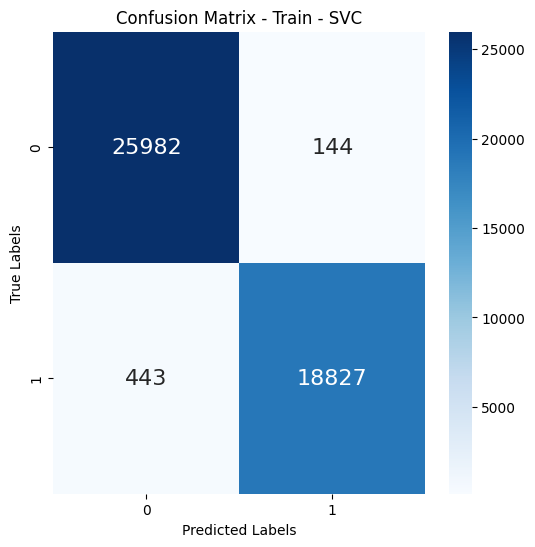

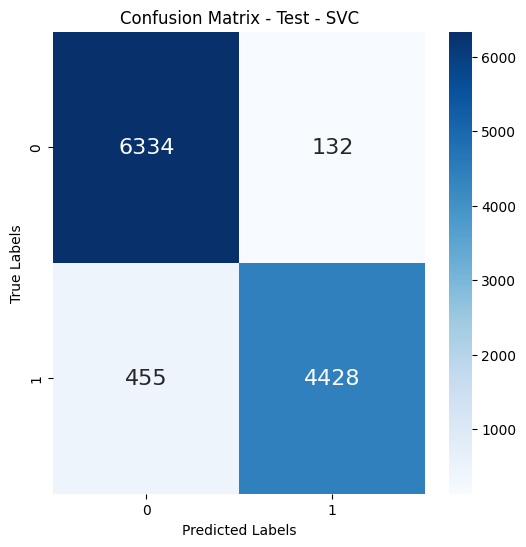

KNeighborsClassifier
*******Train************
Accuracy:  0.6898405145827826
Precision:  0.9525636553889083
Recall:  0.28344577062791904
F1 Score:  0.43689009758438657
*******Test************
Accuracy:  0.650453784474403
Precision:  0.924860853432282
Recall:  0.20417775957403236
F1 Score:  0.33450763294749203

 



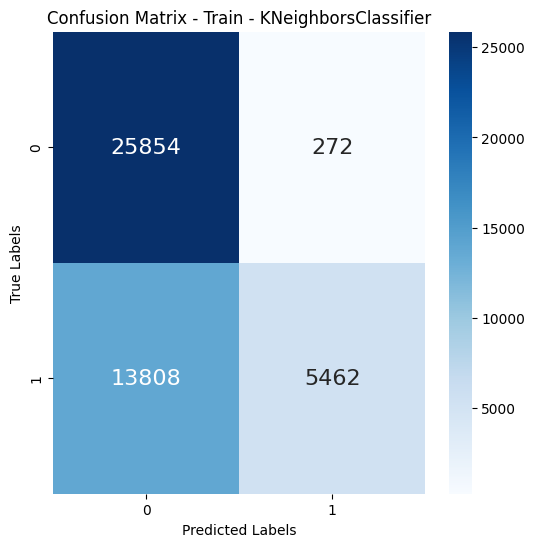

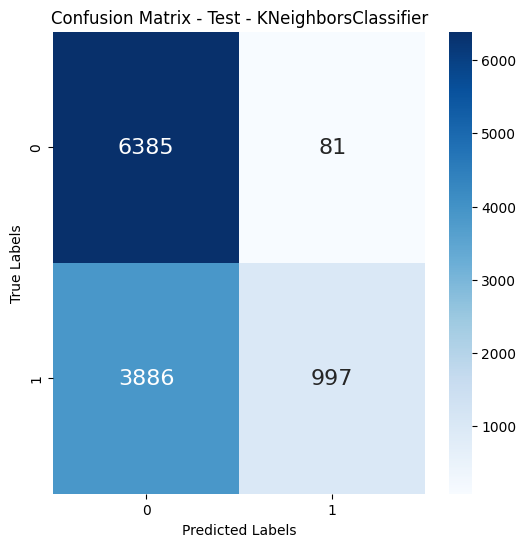

LogisticRegression
*******Train************
Accuracy:  0.9510749845801392
Precision:  0.9741892418089781
Recall:  0.9088220031136481
F1 Score:  0.9403710365935511
*******Test************
Accuracy:  0.9398184862102388
Precision:  0.9689593568557392
Recall:  0.8885930780258038
F1 Score:  0.9270377096464053

 



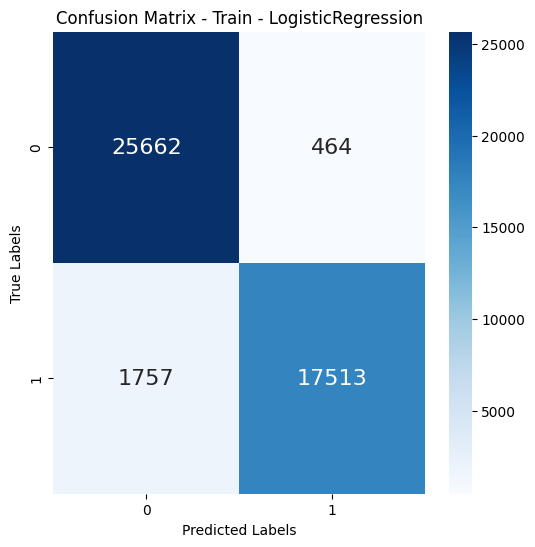

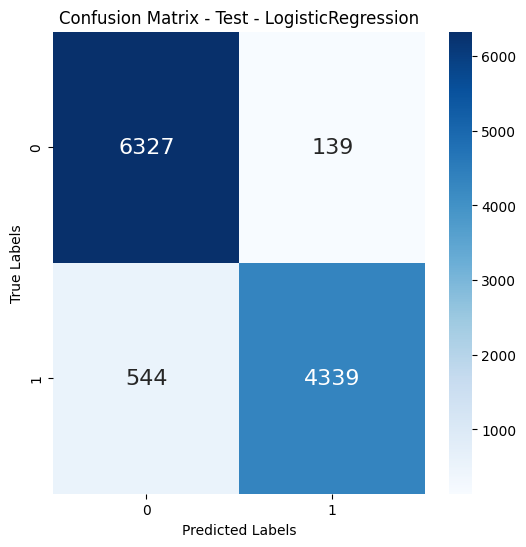

DecisionTreeClassifier
*******Train************
Accuracy:  0.9996695744118425
Precision:  0.9996885867026521
Recall:  0.9995329527763362
F1 Score:  0.9996107636816565
*******Test************
Accuracy:  0.9322407260551591
Precision:  0.9283631820074969
Recall:  0.9129633422076592
F1 Score:  0.9205988642230253

 



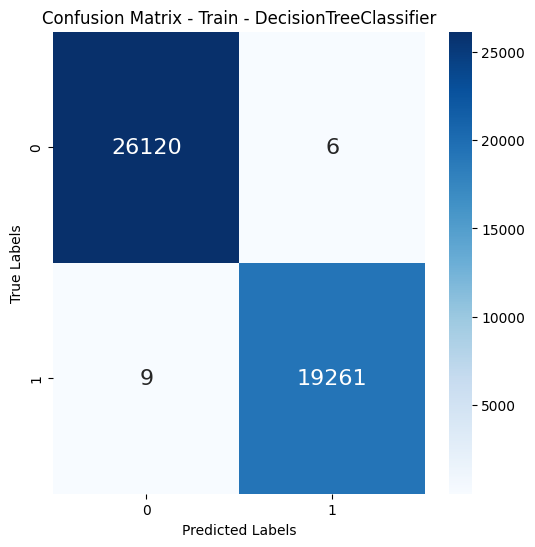

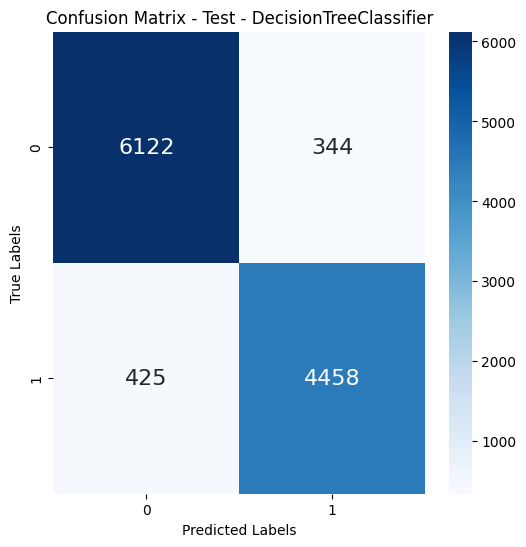

RandomForestClassifier
*******Train************
Accuracy:  0.9996695744118425
Precision:  0.9996885867026521
Recall:  0.9995329527763362
F1 Score:  0.9996107636816565
*******Test************
Accuracy:  0.9446647281698828
Precision:  0.9510281958872164
Recall:  0.9186975220151546
F1 Score:  0.9345833333333333

 



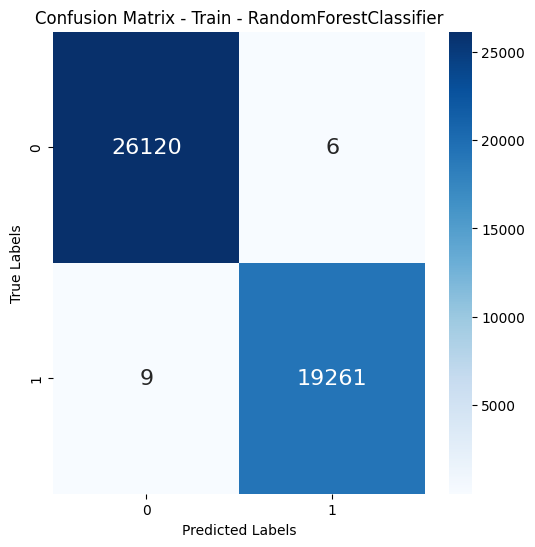

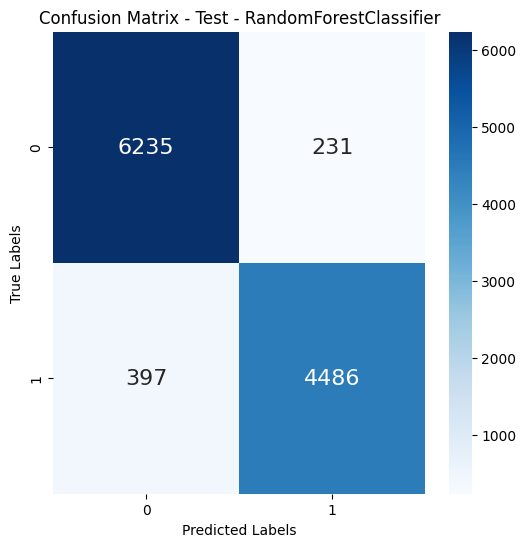

MultinomialNB
*******Train************
Accuracy:  0.9401489117983963
Precision:  0.9252427683296511
Recall:  0.9345096004151531
F1 Score:  0.9298530968424856
*******Test************
Accuracy:  0.9228125826063971
Precision:  0.9089610124515207
Recall:  0.9119393815277493
F1 Score:  0.9104477611940299

 



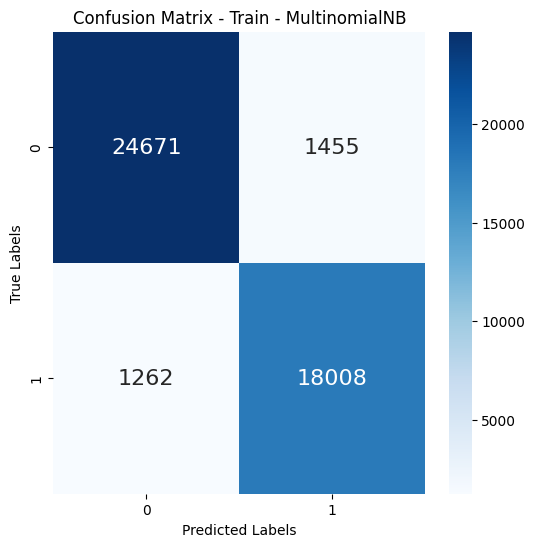

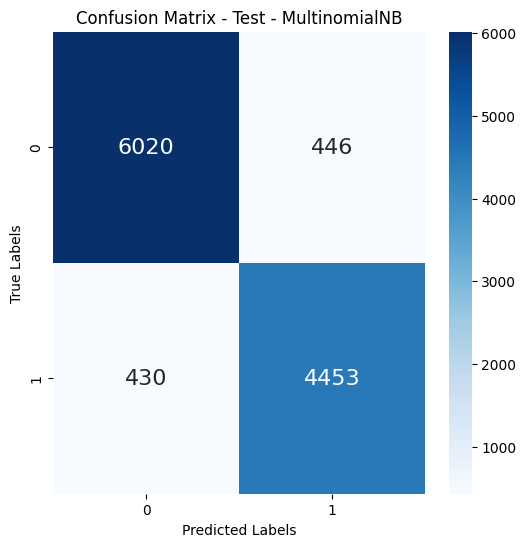

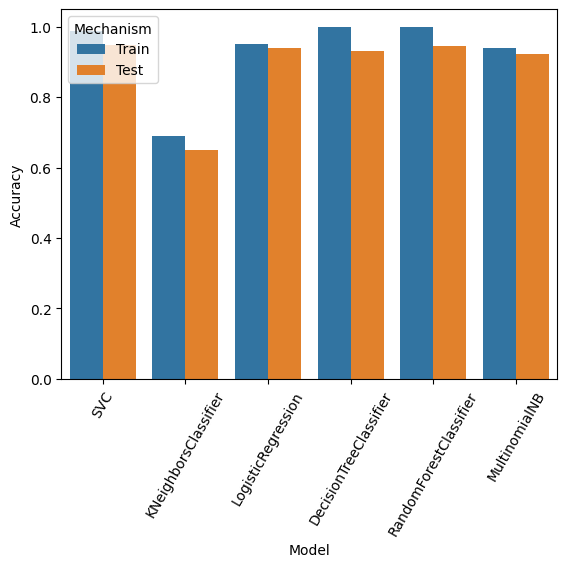

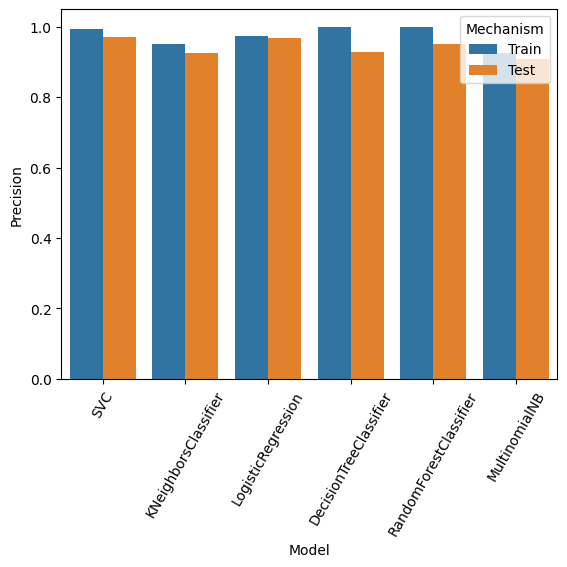

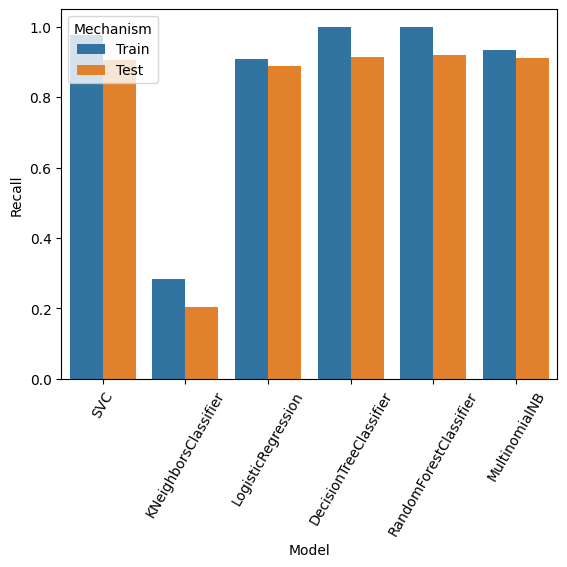

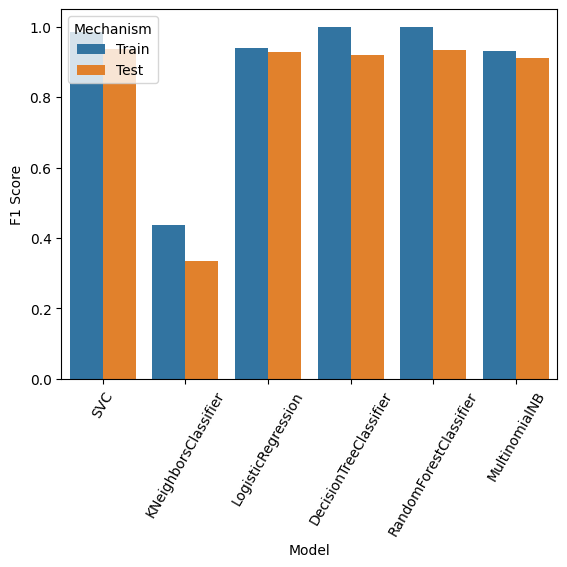

In [ ]:
import sklearn.metrics
import seaborn as sns
models = [SVC(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),MultinomialNB()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    #train_probs = model.predict_proba(x_train)[:, 1]
    test_pred = model.predict(x_test)
    #test_probs = model.predict_proba(x_test)[:, 1]
    print(type(model).__name__)
    model_names.append(type(model).__name__)
    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred))
    print("Recall: ",recall_score(y_train,train_pred))
    print("F1 Score: ",f1_score(y_train,train_pred))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred))
    train_recalls.append(recall_score(y_train,train_pred))
    train_f1s.append(f1_score(y_train,train_pred))

    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred))
    print("Recall: ",recall_score(y_test,test_pred))
    print("F1 Score: ",f1_score(y_test,test_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred))
    test_recalls.append(recall_score(y_test,test_pred))
    test_f1s.append(f1_score(y_test,test_pred))
    print("\n \n")
    # Calculate and display the confusion matrix for training data
    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for training data
    '''plot_roc_auc_curve(y_train, train_probs, f"ROC-AUC Curve - Train - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for testing data
    plot_roc_auc_curve(y_test, test_probs, f"ROC-AUC Curve - Test - {type(model).__name__}")'''

train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = model_names

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = model_names

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall','F1 Score']:
    sns.barplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
    plt.xticks(rotation=60)
    plt.show()

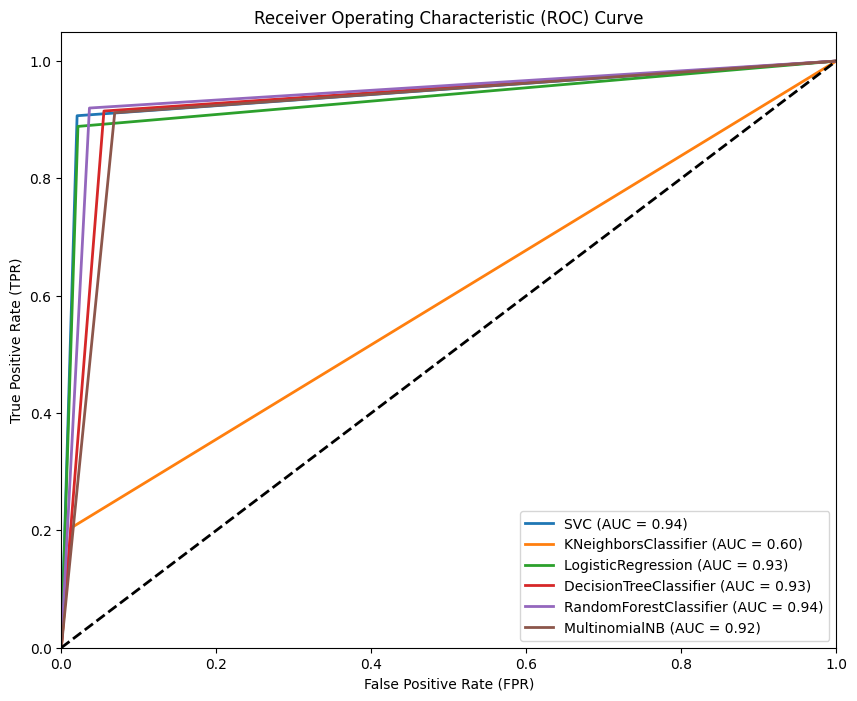

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store ROC curve data
fpr_list = []
tpr_list = []
roc_auc_list = []
model_names = []

models = [SVC(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB()]

for model in models:
    model_name = type(model).__name__
    model_names.append(model_name)

    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    # Calculate ROC-AUC score
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ****Problem 4: Regression Problem 2****

In [ ]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv("p2_train.csv",header=None,names=["A","B","C","Target"])
df1

,A,B,C,Target
0,6.501996,-8.536983,3.422935,119980.220246
1,1.328383,8.943578,-8.145307,29890.224974
2,0.161478,-7.928351,1.628924,3245.579405
3,-8.989890,0.621330,-2.322925,411824.663771
4,5.185118,7.902611,7.559619,176097.137744
...,...,...,...,...
9995,-0.209969,0.516290,1.757739,4.730791
9996,-1.908943,8.884813,-8.949701,67718.037645
9997,5.155422,5.500823,7.804984,165778.153769
9998,7.410197,-3.096079,4.394444,212850.414030


In [ ]:
df2=pd.read_csv("p2_test.csv",header=None,names=["A","B","C","Target"])

In [ ]:
df2

,A,B,C,Target
0,-1.453098,-3.535848,4.957581,5738.079257
1,-0.951478,-4.954119,-4.572673,391.728338
2,3.876805,9.707116,6.012681,72127.820634
3,4.944532,8.173724,2.526409,35939.928053
4,8.422242,1.181565,3.208955,365974.814979
...,...,...,...,...
4995,7.325928,-2.517590,0.681199,158822.870077
4996,5.063459,-1.450395,-7.034063,325.749863
4997,-6.716127,2.112438,2.746665,55743.437853
4998,8.971959,-3.130959,-5.372547,417527.327099


In [ ]:
x=df1.drop(columns=["Target"])
y=df1["Target"]

In [ ]:
#SVR
from sklearn.svm import SVR
model = SVR().fit(x,y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

mse_train= mean_squared_error(y_train,y_train_pred)
mae_train= mean_absolute_error(y_train,y_train_pred)


mse_test= mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)


metrics_train= {"Mean_squared_error_Train":mse_train,
                "Mean_absolute_error_Train":mae_train}

metrics_test= {"Mean_squared_error_Test":mse_test,
                "Mean_absolute_error_Test":mae_test}

print("Train Data: ",metrics_train)
print("Test Data: ",metrics_test)

y_pred= model.predict(df2[["A","B","C"]])

mse_y_pred= mean_squared_error(df2["Target"], y_pred)
mae_y_pred= mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred= {"Mean_squared_error_Test":mse_y_pred,
                "Mean_absolute_error_Test":mae_y_pred}

print("y_pred_metrics: ",metrics_y_pred)



Train Data:  {'Mean_squared_error_Train': 75459864496.41516, 'Mean_absolute_error_Train': 147485.99229845326}
Test Data:  {'Mean_squared_error_Test': 79892066388.63107, 'Mean_absolute_error_Test': 150288.56747878977}
y_pred_metrics:  {'Mean_squared_error_Test': 77888697059.87163, 'Mean_absolute_error_Test': 150475.59108079062}


In [ ]:
#Linear Regression
Linear_model=LinearRegression().fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred= Linear_model.predict(X_train)
y_test_pred= Linear_model.predict(X_test)

mse_train= mean_squared_error(y_train,y_train_pred)
mae_train= mean_absolute_error(y_train,y_train_pred)


mse_test= mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)


metrics_train= {"Mean_squared_error_Train":mse_train,
                "Mean_absolute_error_Train":mae_train}

metrics_test= {"Mean_squared_error_Test":mse_test,
                "Mean_absolute_error_Test":mae_test}

print("Train Data: ",metrics_train)
print("Test Data: ",metrics_test)

y_pred= Linear_model.predict(df2[["A","B","C"]])

mse_y_pred= mean_squared_error(df2["Target"], y_pred)
mae_y_pred= mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_Linear= {"Mean_squared_error_Test":mse_y_pred,
                "Mean_absolute_error_Test":mae_y_pred}

print("y_pred_metrics: ",metrics_y_pred_Linear)


Train Data:  {'Mean_squared_error_Train': 61042815958.91605, 'Mean_absolute_error_Train': 173137.92936374238}
Test Data:  {'Mean_squared_error_Test': 62227903330.995674, 'Mean_absolute_error_Test': 174542.25128146732}
y_pred_metrics:  {'Mean_squared_error_Test': 62332720766.18977, 'Mean_absolute_error_Test': 172939.2986751467}


In [ ]:
#Random Forest
Random_model=RandomForestRegressor().fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred= Random_model.predict(X_train)
y_test_pred= Random_model.predict(X_test)

mse_train= mean_squared_error(y_train,y_train_pred)
mae_train= mean_absolute_error(y_train,y_train_pred)


mse_test= mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)


metrics_train= {"Mean_squared_error_Train":mse_train,
                "Mean_absolute_error_Train":mae_train}

metrics_test= {"Mean_squared_error_Test":mse_test,
                "Mean_absolute_error_Test":mae_test}

print("Train Data: ",metrics_train)
print("Test Data: ",metrics_test)

y_pred= Random_model.predict(df2[["A","B","C"]])

mse_y_pred= mean_squared_error(df2["Target"], y_pred)
mae_y_pred= mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_Random= {"Mean_squared_error_Test":mse_y_pred,
                        "Mean_absolute_error_Test":mae_y_pred}

print("y_pred_metrics: ",metrics_y_pred_Random)


Train Data:  {'Mean_squared_error_Train': 44370710.10386732, 'Mean_absolute_error_Train': 3214.691926843174}
Test Data:  {'Mean_squared_error_Test': 58834269.89971621, 'Mean_absolute_error_Test': 3491.1235678436437}
y_pred_metrics:  {'Mean_squared_error_Test': 316747534.4402599, 'Mean_absolute_error_Test': 8875.280294363001}


In [ ]:
#Decision Tree
Decision_model=DecisionTreeRegressor().fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred= Decision_model.predict(X_train)
y_test_pred= Decision_model.predict(X_test)

mse_train= mean_squared_error(y_train,y_train_pred)
mae_train= mean_absolute_error(y_train,y_train_pred)


mse_test= mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)


metrics_train= {"Mean_squared_error_Train":mse_train,
                "Mean_absolute_error_Train":mae_train}

metrics_test= {"Mean_squared_error_Test":mse_test,
                "Mean_absolute_error_Test":mae_test}

print("Train Data: ",metrics_train)
print("Test Data: ",metrics_test)

y_pred= Decision_model.predict(df2[["A","B","C"]])

mse_y_pred= mean_squared_error(df2["Target"], y_pred)
mae_y_pred= mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_Decision= {"Mean_squared_error_Test":mse_y_pred,
                        "Mean_absolute_error_Test":mae_y_pred}

print("y_pred_metrics: ",metrics_y_pred_Decision)


Train Data:  {'Mean_squared_error_Train': 0.0, 'Mean_absolute_error_Train': 0.0}
Test Data:  {'Mean_squared_error_Test': 0.0, 'Mean_absolute_error_Test': 0.0}
y_pred_metrics:  {'Mean_squared_error_Test': 763569867.1719823, 'Mean_absolute_error_Test': 13784.448425859671}


# ****Problem 3: Regression Problem 1****

In [ ]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv("p1_train.csv",header=None,names=["A","B","Target"])
df1

,A,B,Target
0,-7.262173,9.572604,5.358725
1,3.462140,10.684524,-13.275822
2,-12.996801,-3.446163,31.815190
3,7.083537,-14.074146,1.995030
4,-15.216890,-18.630651,48.812452
...,...,...,...
9995,16.981033,-7.377274,-21.776089
9996,0.258434,-19.488764,22.098571
9997,17.588664,11.326009,-47.812604
9998,0.531756,-15.189405,20.791085


In [ ]:
df2=pd.read_csv("p1_test.csv",header=None,names=["A","B","Target"])

In [ ]:
df2

,A,B,Target
0,15.893003,11.712829,-37.567929
1,-2.722421,-4.540615,11.475211
2,-14.587111,18.592864,11.468441
3,0.224331,16.433306,-15.159309
4,-12.215286,11.742682,17.392223
...,...,...,...
4995,-14.424996,7.055352,21.402087
4996,-12.249485,12.226991,14.971488
4997,-19.242759,-18.218209,56.687193
4998,-13.561869,2.773022,26.627790


In [ ]:
x=df1.drop(columns=["Target"])
y=df1["Target"]

In [ ]:
Linear_model=LinearRegression().fit(x, y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_pred= Linear_model.predict(X_train)
y_test_pred= Linear_model.predict(X_test)

mse_train= mean_squared_error(y_train,y_train_pred)
mae_train= mean_absolute_error(y_train,y_train_pred)


mse_test= mean_squared_error(y_test, y_test_pred)
mae_test= mean_absolute_error(y_test, y_test_pred)


metrics_train= {"Mean_squared_error_Train":mse_train,
                "Mean_absolute_error_Train":mae_train}

metrics_test= {"Mean_squared_error_Test":mse_test,
                "Mean_absolute_error_Test":mae_test}

print("Train Data: ",metrics_train)
print("Test Data: ",metrics_test)

y_pred= Linear_model.predict(df2[["A","B"]])

mse_y_pred= mean_squared_error(df2["Target"], y_pred)
mae_y_pred= mean_absolute_error(df2["Target"], y_pred)

metrics_y_pred_Linear= {"Mean_squared_error_Test":mse_y_pred,
                "Mean_absolute_error_Test":mae_y_pred}

print("y_pred_metrics: ",metrics_y_pred_Linear)


Train Data:  {'Mean_squared_error_Train': 5.054234220218337, 'Mean_absolute_error_Train': 1.793708330761995}
Test Data:  {'Mean_squared_error_Test': 5.081486197345235, 'Mean_absolute_error_Test': 1.7839327239219742}
y_pred_metrics:  {'Mean_squared_error_Test': 5.046436003951252, 'Mean_absolute_error_Test': 1.7990800530982611}
